In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
baseball=pd.read_csv('baseball.csv')

In [3]:
baseball.shape

(1232, 15)

In [4]:
baseball.head(10)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
5,CHW,AL,2012,748,676,85,0.318,0.422,0.255,0,NaN,NaN,162,0.319,0.405
6,CIN,NL,2012,669,588,97,0.315,0.411,0.251,1,2.0,4.0,162,0.305,0.390
7,CLE,AL,2012,667,845,68,0.324,0.381,0.251,0,NaN,NaN,162,0.336,0.430
8,COL,NL,2012,758,890,64,0.330,0.436,0.274,0,NaN,NaN,162,0.357,0.470
9,DET,AL,2012,726,670,88,0.335,0.422,0.268,1,6.0,2.0,162,0.314,0.402


In [5]:
moneyball=baseball[baseball['Year']<2002] # using data Paul DePodesta had {Only including data before year 2002}

In [6]:
moneyball.shape

(902, 15)

In [7]:
#to predict wins using the difference between runs scored and runs allowed.
moneyball['RD']=moneyball['RS']-moneyball['RA']

C:\Users\Akshay Gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
moneyball.head(7)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27
335,CHC,NL,2001,777,701,88,0.336,0.430,0.261,0,NaN,NaN,162,0.321,0.398,76
336,CHW,AL,2001,798,795,83,0.334,0.451,0.268,0,NaN,NaN,162,0.334,0.427,3


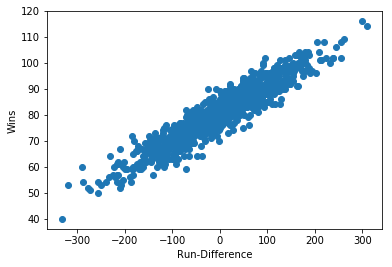

In [9]:
#visually check to see if there's a linear relationship between Run Difference and Wins.
#By plotting scatter plot
plt.scatter(moneyball.RD,moneyball.W)
plt.xlabel('Run-Difference')
plt.ylabel('Wins')
plt.show()

Scatter plot shows there a strong linear relationsip between 'Run Difference' and 'Wins'

In [10]:
X = np.array(moneyball.RD) #Run Difference
y = np.array(moneyball.W) # Wins

In [11]:
print(X.shape,y.shape)

(902,) (902,)


In [12]:
print(type(X),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [13]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)

In [14]:
print(X.shape,y.shape)

(902, 1) (902, 1)


In [15]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
import statsmodels.formula.api as sm
regressor_OLS=sm.OLS(endog=y,exog=X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     15.72
Date:                Sun, 03 Mar 2019   Prob (F-statistic):           7.92e-05
Time:                        11:41:26   Log-Likelihood:                -5243.4
No. Observations:                 902   AIC:                         1.049e+04
Df Residuals:                     901   BIC:                         1.049e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1058      0.027      3.965      0.000       0.053       0.158
==============================================================================
Omnibus:                        5.788   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.736
Skew:                          -0.195   Prob(JB):                       0.0568
Kurtosis:                       3.033   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
regressor.score(X,y) #This gives us R^2 of our model

0.8808103719972755

Since R^2 is 0.88, So we have strong modelt to predict wins using difference of runs scored & runs allowed

In [18]:
from sklearn.metrics import r2_score
r2_score(X,y)

-0.4407783274875632

In [19]:
from sklearn import model_selection

results = model_selection.cross_val_score(regressor, X, y,cv=3)
print(results)

[0.8718518  0.87226065 0.8927539 ]


In [20]:
results = model_selection.cross_val_score(regressor, X, y,cv=3)
print(("R^2: %.3f (%.3f)") % (results.mean(), results.std()))

R^2: 0.879 (0.010)


In [21]:
regressor.intercept_ #intercept value # Wins

array([80.88137472])

In [22]:
regressor.coef_ # Coeficient of RD

array([[0.10576562]])

In [23]:
regressor.score(X,y) # Variance Score

0.8808103719972755

In [24]:
# print(np.mean((regressor.predict(X_test))-(y_test)**2))  # Mean Squared Error

Therefore, 80.88137472 + 0.10576562[RD] >= 95

# After Calculation, RD > =133.4 

# Hence we predict that if RD>= 133.4 then team will win at least 95 games